PDF

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import stats
import math
import scipy
from functools import partial
import matplotlib.pyplot as plt
plt.style.use('classic')
from scipy.stats import multiscale_graphcorr

In [2]:
class Probability_Distribution_Function_AND_New_Function(object):
    def __init__(self, mu=0, sigma=1, length = 1000):
        self.mean = mu
        self.standard_deviation = sigma
        self.length = length
        self.data = []
        self.data2 = []
        self.sample = []
        self.init_data(addition_data = "false")
        self.calculate_mean()
        self.calculate_standard_deviation()
        self.x_axis_enviroment = np.linspace(-1, 1, num=100)
        self.y_asis_enviroment = self.x_axis_enviroment + 0.3 * np.random.random(self.x_axis_enviroment.size)
        self.stat, self.pvalue, self.mgc_dict = multiscale_graphcorr(self.x_axis_enviroment, self.y_asis_enviroment)

    
    
    
    def create_linspace(self, start, stop):
        temp = (stop - start) / 0.2
        print(stop)
        print(start)
        temp2 = (40 - 10 / 0.002)
        print(temp)
        return np.linspace(start, stop, temp)  
    
    
    def init_data(self, addition_data = "false"):
        if addition_data == "false":
            self.data = np.random.normal(loc=self.mean,scale=self.standard_deviation,size=(self.length))
        elif addition_data == "2d":
            self.data = np.random.normal(loc=self.mean,scale=self.standard_deviation,size=(self.length))
            self.data2 = np.random.normal(loc=self.mean,scale=self.standard_deviation+2,size=(self.length))
        elif addition_data == "regular_for2":
            self.data = np.random.normal(loc=self.mean,scale=self.standard_deviation,size=(self.length+100000))
            self.data2 = np.random.normal(loc=self.mean+20,scale=self.standard_deviation,size=((self.length-100000)))
        elif addition_data == "new_algo":
            self.sample = np.linspace(-15, 15, self.length)
            functin_sample = self.new_created_function(self.sample)
            self.data = np.random.choice(self.sample, size=1000, p=functin_sample/np.sum(functin_sample))
        elif addition_data == "true2d":
            self.sample = np.linspace(-15, 15, self.length)
            functin_sample = self.new_created_function(self.sample)
            self.data = np.random.choice(self.sample, size=1000, p=functin_sample/np.sum(functin_sample))
            self.sample = np.linspace(-15, 15 , self.length)
            functin_sample = self.new_created_function(self.sample)
            self.data2 = np.random.choice(self.sample, size=1000, p=functin_sample/np.sum(functin_sample))
        elif addition_data == "new_two":
            self.sample = np.linspace(10, 40, int((30) / 0.02))
            functin_sample = self.new_created_function(self.sample)
            self.data = np.random.choice(self.sample, size=1000, p=functin_sample/np.sum(functin_sample))
            
            self.sample = np.linspace(-40, -10, int((30) / 0.02))
            print(self.sample)
            functin_sample = self.new_created_function(self.sample)
            print(functin_sample)
            self.data2 = np.random.choice(self.sample, size=1000, p=functin_sample/np.sum(functin_sample))
        

    
    def calculate_mean(self):
        self.mean = sum(self.data) // len(self.data)
        return self.mean

    def calculate_standard_deviation(self,sample=True):
        if sample:
            n = len(self.data) - 1 
        else:
            n = len(self.data)
        mean = self.mean
        sigma = 0
        for el in self.data:
            sigma += (el - mean)**2
        sigma = math.sqrt(sigma / n)
        self.standard_deviation = sigma
        return self.standard_deviation
    
    def plot_graphs(self, pdf_type="regular"):
        if pdf_type == "regular":
            fig, ax0 = plt.subplots(ncols=1, nrows=1)
            ax0.hist(self.data,bins=100,density=True,label="Histogram of samples")
        
            data = np.linspace(self.data.min() - 1, self.data.max() + 1, 500)
            ax0.plot(self.data, np.zeros(self.data.shape), 'b+',color='red', ms=12)
            pdf = self.probability_distribution_function(data)

            ax0.plot(data, pdf, label="PDF",color='purple')
            ax0.legend()
            ax0.set_title('PDF of samples from numpy.random.normal()')
            plt.show()
            
        else:
            self.init_data(addition_data = "new_algo")
            fig, ax0 = plt.subplots(ncols=1, nrows=1)
            ax0.hist(self.data,bins=100,density=True,label="Histogram of samples")
        
            data = np.linspace(self.data.min() - 1, self.data.max() + 1, 500)
            ax0.plot(self.data, np.zeros(self.data.shape), 'b+',color='red', ms=12)
            pdf = self.new_created_function(data)

            ax0.plot(data, pdf, label="PDF",color='purple')
            ax0.legend()
            ax0.set_title('PDF of samples from numpy.random.normal()')
            plt.show()
        

    def binolial_graph(self, pdf_type="regular"):
        if pdf_type == "regular":
            
            fig, ax0 = plt.subplots(ncols=1, nrows=1)
            self.init_data(addition_data = "regular_for2")
        
            data = np.concatenate([self.data ,self.data2])
            x_eval = np.linspace(data.min() - 1, data.max() + 1, 500)
        
            ax0.hist(data,bins=100,density=True,color="blue",label="Histogram of samples 1")
            ax0.plot(data, np.zeros(data.shape), 'b+',color='red', ms=12)
            ax0.hist(self.data2,bins=100,density=True,color="yellow",label="Histogram of samples 2")
        
            kde = stats.gaussian_kde(data)
        
            ax0.plot(x_eval, kde(x_eval), 'k-',color="purple", label="Scott's Rule Guassian")

            ax0.legend()
            ax0.set_title('PDF of samples from numpy.random.normal()')
            plt.show()
            
        else:
            fig, ax0 = plt.subplots(ncols=1, nrows=1)
            self.init_data(addition_data = "new_two")
        
            data = np.concatenate([self.data ,self.data2])
            x_eval = np.linspace(data.min() - 1, data.max() + 1, 500)
        
            ax0.hist(data,bins=100,density=True,color="blue",label="Histogram of samples 1")
            ax0.plot(data, np.zeros(data.shape), 'b+',color='red', ms=12)
            ax0.hist(self.data2,bins=100,density=True,color="yellow",label="Histogram of samples 2")
        
            kde = stats.gaussian_kde(data)
        
            ax0.plot(x_eval, kde(x_eval), 'k-',color="purple", label="Scott's Rule Guassian")

            ax0.legend()
            ax0.set_title('PDF of samples from numpy.random.normal()')
            plt.show()
            
           
        
    def probability_distribution_function(self, x):
        return (1.0 / (self.standard_deviation * np.sqrt(2*math.pi))) * np.exp(-0.5*((x - self.mean) / self.standard_deviation) ** 2)
    
    
    def new_created_function(self, x):
        return (1.0 / (self.standard_deviation * np.sqrt(2*math.pi))) * np.exp(-0.5*((x - self.mean) / self.standard_deviation) ** 4 + 0.5*((x - self.mean) / self.standard_deviation) ** 2)
    
    
    def representation_in2d(self, pdf_type="regular"):
        
        if pdf_type == "regular":
            self.init_data(addition_data = "2d")
            temp1 = self.data + self.data2
            temp2 = self.data - self.data2
        
            xmin = temp1.min()
            xmax = temp1.max()
            ymin = temp2.min()
            ymax = temp2.max()
        
            X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
            positions = np.vstack([X.ravel(), Y.ravel()])
            values = np.vstack([temp1, temp2])
            kernel = stats.gaussian_kde(values)
            Z = np.reshape(kernel.evaluate(positions).T, X.shape)
        
        
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
            ax.plot(temp1, temp2, 'k.', markersize=2)
            ax.set_xlim([xmin, xmax])
            ax.set_ylim([ymin, ymax])
            plt.show()
            
        else:
            self.init_data(addition_data = "true2d")
            temp1 = self.data + self.data2
            temp2 = self.data - self.data2
        
            xmin = temp1.min()
            xmax = temp1.max()
            ymin = temp2.min()
            ymax = temp2.max()
        
            X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
            positions = np.vstack([X.ravel(), Y.ravel()])
            values = np.vstack([temp1, temp2])
            kernel = stats.gaussian_kde(values)
            Z = np.reshape(kernel.evaluate(positions).T, X.shape)
        
        
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
            ax.plot(temp1, temp2, 'k.', markersize=2)
            ax.set_xlim([xmin, xmax])
            ax.set_ylim([ymin, ymax])
            plt.show()
        
        
    def mgc_plot(self, sim_name, only_viz=False, only_mgc=False):
        if not only_mgc:
            plt.figure(figsize=(8, 8))
            ax = plt.gca()
            ax.set_title(sim_name + " Simulation", fontsize=20)
            ax.scatter(self.x_axis_enviroment, self.y_axis_enviroment)
            ax.set_xlabel('X', fontsize=15)
            ax.set_ylabel('Y', fontsize=15)
            ax.axis('equal')
            ax.tick_params(axis="x", labelsize=15)
            ax.tick_params(axis="y", labelsize=15)
            plt.show()

        if not only_viz:
            plt.figure(figsize=(8,8))
            ax = plt.gca()
            mgc_map = self.mgc_dict["mgc_map"]
            ax.set_title("Local Correlation Map", fontsize=20)
            im = ax.imshow(mgc_map, cmap='YlGnBu')
            # colorb
            cbar = ax.figure.colorbar(im, ax=ax)
            cbar.ax.set_ylabel("", rotation=-90, va="bottom")
            ax.invert_yaxis()
            
            # Turn spines off and create white grid.
            for edge, spine in ax.spines.items():
                spine.set_visible(False)
            # optimal scale
            opt_scale = self.mgc_dict["opt_scale"]
            ax.scatter(opt_scale[0], opt_scale[1], marker='X', s=200, color='red')
            # other formatting
            ax.tick_params(bottom="off", left="off")
            ax.set_xlabel('#Neighbors for X', fontsize=15)
            ax.set_ylabel('#Neighbors for Y', fontsize=15)
            ax.tick_params(axis="x", labelsize=15)
            ax.tick_params(axis="y", labelsize=15)
            ax.set_xlim(0, 100)
            ax.set_ylim(0, 100)
            plt.show()

            

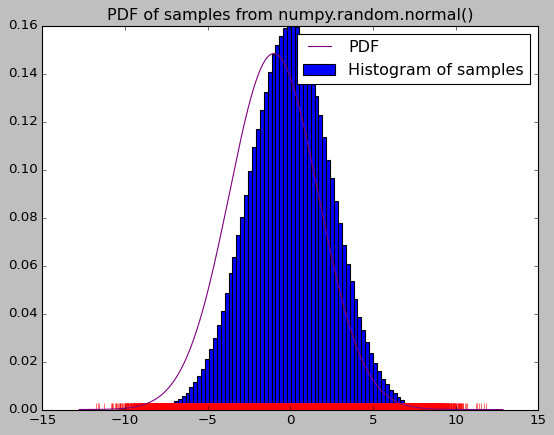

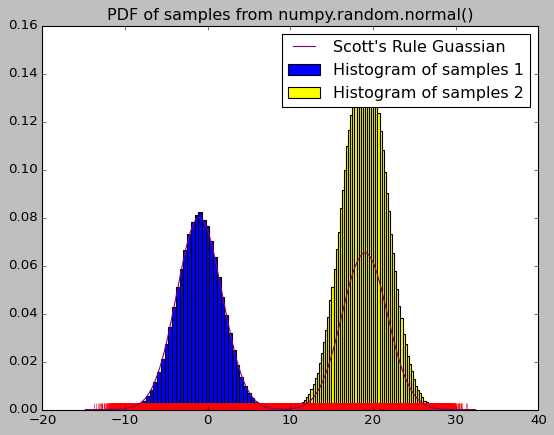

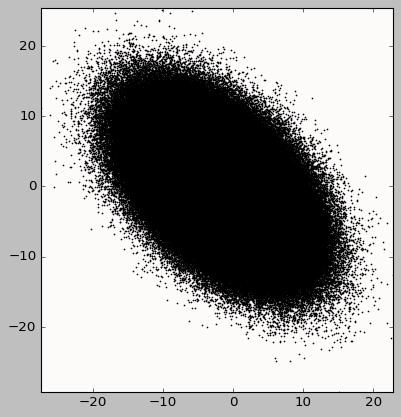

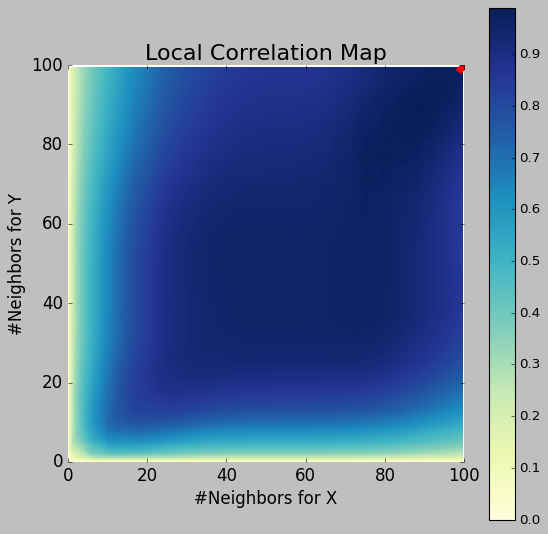

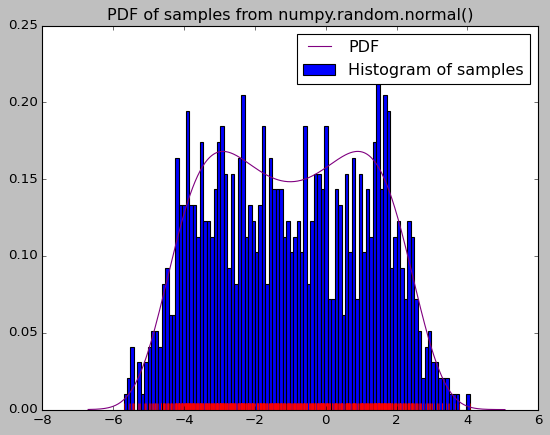

In [3]:
pdf_class = Probability_Distribution_Function_AND_New_Function(0,2.5,1000000)
pdf_class.plot_graphs(pdf_type="regular")
pdf_class.binolial_graph(pdf_type="regular")
pdf_class.representation_in2d(pdf_type="regular")
pdf_class.mgc_plot("Linear", only_mgc=True)
pdf_class.plot_graphs(pdf_type="not regular")

In [4]:
# pdf_class.binolial_graph(pdf_type="not regular")

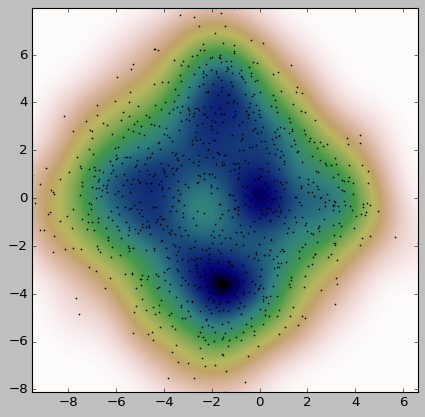

In [5]:
pdf_class.representation_in2d(pdf_type="not regular")